# Load ใช้งาน Model 


In [1]:
from tensorflow.keras.models import load_model

my_model = load_model('./mymodel.h5') 

In [2]:
my_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [3]:
my_model.get_config()

{'name': 'sequential_3',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 2),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_4'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_6',
    'trainable': True,
    'dtype': 'float32',
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_7',
    'trainable': True,
    'dtype': 'float32',
    'units': 1,
    'activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'co

In [ ]:
my_model.get_weights()

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(my_model, show_shapes=True, show_layer_names=True)

## Load Feature Scaler

In [4]:
import pickle

sc2 = pickle.load(open('./scaler.pkl','rb'))

## Load Classnames

In [5]:
file_name = "classname.pkl"
open_file = open(file_name, "rb")
class_names = pickle.load(open_file)
open_file.close()

class_names

Index(['malignant', 'benign'], dtype='object')

## Prediction

In [6]:
# X_new = [[16.4, 14.1]] # 
X_new = [[16.4, 14.1],  # 
         [18.5, 15.1],
         [17.7, 18.7]] #

X_new_sc = sc2.transform(X_new)
X_new_sc

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.64548141, -1.20766604],
       [ 1.24191122, -0.97495933],
       [ 1.01469986, -0.13721517]])

In [7]:
y_pred_pr = my_model.predict(X_new_sc)
y_pred = (y_pred_pr > 0.5).astype(int) 
y_pred

1/1 [==============================] - 0s 100ms/step


array([[1],
       [0],
       [0]])

In [8]:
y_pred = y_pred.reshape(1,-1)[0]
y_pred

array([1, 0, 0])

In [9]:
print(class_names[y_pred])

Index(['benign', 'malignant', 'malignant'], dtype='object')


## Decision Regions

3888/3888 [==============================] - 5s 1ms/step


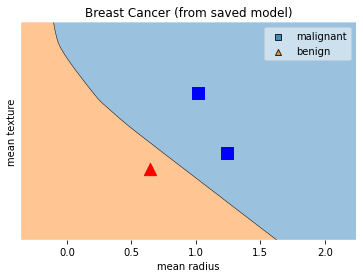

In [10]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

y = y_pred
ax = plot_decision_regions(X_new_sc, y, clf=my_model)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title('Breast Cancer (from saved model)') 
# plt.xticks([])
plt.yticks([])
plt.xlabel('mean radius')
plt.ylabel('mean texture')

plt.scatter(X_new_sc[:,0][y==0], X_new_sc[:,1][y==0], marker='s', s=150, c='b')
plt.scatter(X_new_sc[:,0][y==1], X_new_sc[:,1][y==1], marker='^', s=150, c='r')
plt.show()